In [2]:
import sys
sys.path.append('../')

import numpy as np
import torch
from sklearn import svm
from sklearn.linear_model import Perceptron

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn

from contextlib import redirect_stdout
import ast

import FullRankRNN as rnn
import Reinforce as rln

/home/martina/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
critic_network = rnn.FullRankRNN(input_size=131, hidden_size=128, output_size=1,
                                 noise_std=0, alpha=0.2, rho=0.8, beta=1,
                                 train_wi=True, train_wo=True, train_wrec=True)

critic_network.load_state_dict(torch.load("models/RL_critic_network_good.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [3]:
wo_critic = critic_network.wo.data

In [2]:
#print(wo_critic.shape, "\n", wo_critic)

In [4]:
wo_perceptron = pd.read_csv('perceptron_wo.csv')

In [5]:
wo_perceptron = wo_perceptron.to_numpy()

In [3]:
#print(wo_perceptron.shape, "\n", wo_perceptron)

Text(0.5, 1.0, 'wo critic vs perceptron')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


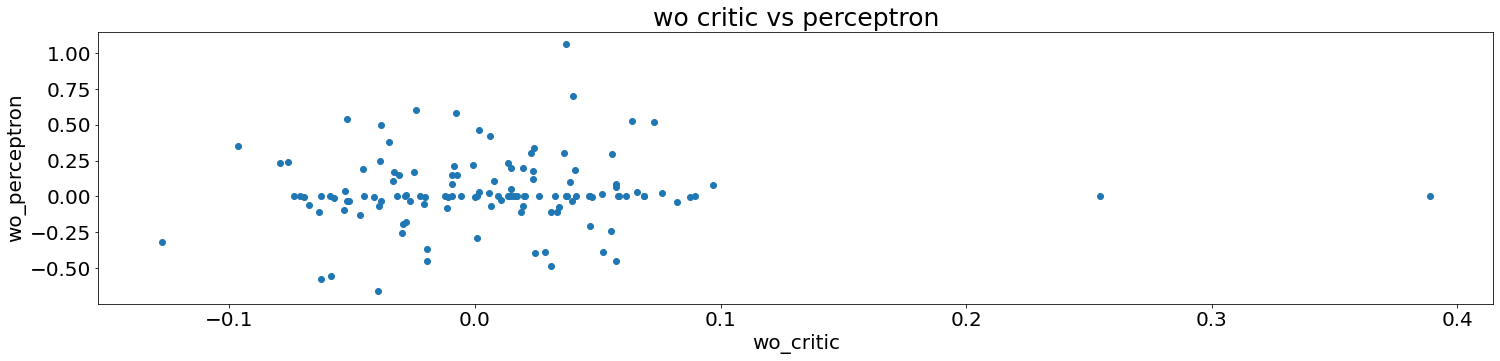

In [6]:
plt.figure(figsize=(25,5))
plt.scatter(wo_critic, wo_perceptron/4000)

plt.xlabel("wo_critic", size=20)
plt.ylabel("wo_perceptron", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("wo critic vs perceptron", size=25)

In [3]:
reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                          name_load_critic="models/RL_critic_network_good.pt")

In [6]:
iterations = 500 

observations, rewards, actions,\
log_action_probs, entropies, values,\
trial_begins, errors, frates_actor, frates_critic,\
timeav_values, final_actions, overall_values, stimuli = reinforce.experience(iterations)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500


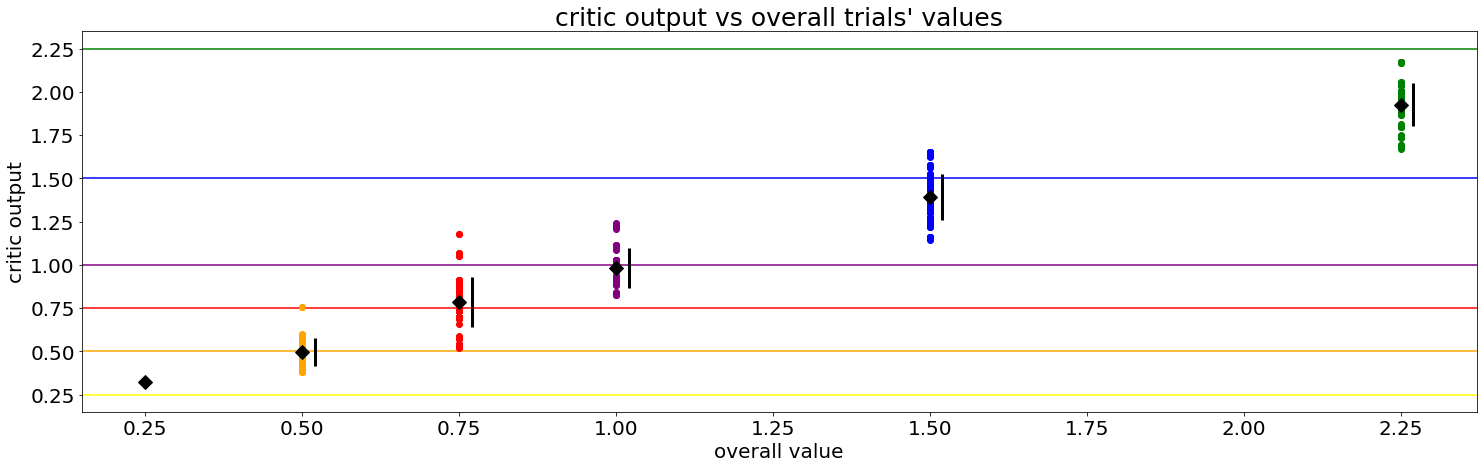

In [41]:
global_values = overall_values
lista1 = []
lista2 = []
lista3 = []
lista4 = []
lista5 = []
lista6 = []

plt.figure(figsize=(25,7))

for i in range(len(global_values)):
    if global_values[i] == 0.25:
        color="yellow"
        lista1.append(timeav_values[i])
    if global_values[i] == 0.5:
        color="orange"
        lista2.append(timeav_values[i])
    if global_values[i] == 0.75:
        color="red"
        lista3.append(timeav_values[i])
    if global_values[i] == 1:
        color="purple"
        lista4.append(timeav_values[i])
    if global_values[i] == 1.5:
        color="blue"
        lista5.append(timeav_values[i])
    if global_values[i] == 2.25:
        color="green"
        lista6.append(timeav_values[i])
    plt.plot(global_values[i], timeav_values[i], "o", color=color, zorder=1)
    
plt.axhline(0.25, color="yellow", zorder=0)
plt.axhline(0.5, color="orange", zorder=0)
plt.axhline(0.75, color="red", zorder=0)
plt.axhline(1, color="purple", zorder=0)
plt.axhline(1.5, color="blue", zorder=0)
plt.axhline(2.25, color="green", zorder=0)

media1 = np.mean(lista1)
std1 = np.std(lista1)
media2 = np.mean(lista2)
std2 = np.std(lista2)
media3 = np.mean(lista3)
std3 = np.std(lista3)
media4 = np.mean(lista4)
std4 = np.std(lista4)
media5 = np.mean(lista5)
std5 = np.std(lista5)
media6 = np.mean(lista6)
std6 = np.std(lista6)
x_values = [0.25, 0.5, 0.75, 1, 1.5, 2.25]
medie = [media1, media2, media3, media4, media5, media6]
stds = [std1, std2, std3, std4, std5, std6]

for i in range(6):
    plt.plot(x_values[i], medie[i], "D", color="black", markersize=10, zorder=2)
    plt.vlines(x_values[i]+0.02, medie[i] - stds[i], medie[i] + stds[i], color="black", linewidth=3, zorder=2)


plt.xlabel("overall value", size=20)
plt.ylabel("critic output", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("critic output vs overall trials' values", size=25);